![Titanic](img/titanic1.jpg)

# Импорт Pandas

In [1]:
import pandas as pd

# "Константы"

In [2]:
# Файл с данными
TITANIC_CSV_DATA_PATH = "data/titanic.csv"

# Имена колонок
NAME_COL = "name"
SEX_COL = "sex"
PCLASS_COL = "pclass"
AGE_COL = "age"
SURVIVED_COL = "survived"
BODY_COL = "body"
CABIN_COL = "cabin"

# Новые колонки
AGE_GROUP_COL = "age_group"
BODY_HASVAL_COL = "body_has_value"
CABIN_LEVEL_COL = "cabin_level"

# Загружаем данные в DataFrame

In [3]:
df = pd.read_csv(TITANIC_CSV_DATA_PATH, sep=';', decimal=',')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# Информация о данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [5]:
df.shape

(1310, 14)

## % пустых значений

In [6]:
# df.isna() вернёт {1 : 0} - 1 для None
nones = df.isna().sum() / len(df) * 100
nones = nones.sort_values(ascending=False)
nones.map("{:,.4f} %".format)

body         90.7634 %
cabin        77.4809 %
boat         62.9008 %
home.dest    43.1298 %
age          20.1527 %
embarked      0.2290 %
fare          0.1527 %
ticket        0.0763 %
parch         0.0763 %
sibsp         0.0763 %
sex           0.0763 %
name          0.0763 %
survived      0.0763 %
pclass        0.0763 %
dtype: object

# Категориальные признаки

## Пол 

In [7]:
df[SEX_COL].value_counts()

male      843
female    466
Name: sex, dtype: int64

<AxesSubplot:ylabel='sex'>

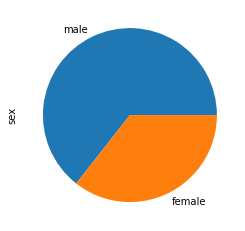

In [9]:
df[SEX_COL].value_counts().plot.pie()

## Класс каюты

In [10]:
df[PCLASS_COL].value_counts()

3.0    709
1.0    323
2.0    277
Name: pclass, dtype: int64

<AxesSubplot:ylabel='pclass'>

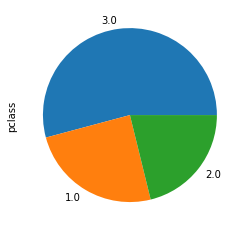

In [11]:
df[PCLASS_COL].value_counts().plot.pie()

# Численные признаки

## Средний возраст 

In [12]:
df[AGE_COL].mean()

29.8811345124283

## Распределение по возрасту 

<AxesSubplot:ylabel='Frequency'>

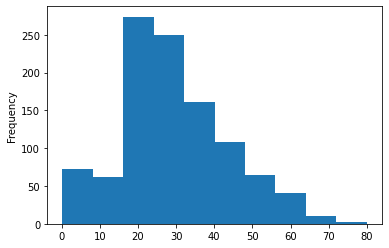

In [13]:
df[AGE_COL].plot(kind="hist")

## Возраст - кол-во уникальных значений

In [14]:
df[AGE_COL].value_counts().count()

98

## Создаём возрастные категории с диапазоном 10 лет 

In [15]:
# Добавляем новую колонку (признак)
df[AGE_GROUP_COL] = df[AGE_COL]
# Для неуказанного возраста ставим значение -1
df[AGE_GROUP_COL].fillna(-1, inplace=True)
df[AGE_GROUP_COL] = df[AGE_GROUP_COL].map(lambda age: int(age // 10) + 1)
#df[AGE_GROUP_COL] = df[AGE_GROUP_COL].apply(lambda age: int(age // 10) + 1)
features = [AGE_COL, AGE_GROUP_COL]
df[features].head()

# age_group читаем как до n * 10 лет, например age_group = 3, означает от 20 до 30 лет.

,age,age_group
0,29.0000,3
1,0.9167,1
2,2.0000,1
3,30.0000,4
4,25.0000,3


<AxesSubplot:ylabel='age_group'>

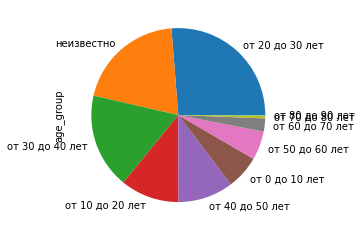

In [18]:
vvc = df[AGE_GROUP_COL].map(
    lambda age_group: 
    age_group and "от {} до {} лет".format((age_group -1) * 10, age_group * 10) 
    or "неизвестно")
vvc.value_counts().plot.pie()

# Исследование зависимостей

## Выжившие по возрастным группам 

In [19]:
df[[AGE_GROUP_COL, SURVIVED_COL]].head()

,age_group,survived
0,3,1.0
1,1,1.0
2,1,0.0
3,4,0.0
4,3,0.0


In [20]:
age_by_survived = df.groupby([AGE_GROUP_COL, SURVIVED_COL])
print(type(age_by_survived))
age_by_survived.size()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


age_group  survived
0          0.0         190
           1.0          73
1          0.0          32
           1.0          50
2          0.0          87
           1.0          56
3          0.0         217
           1.0         127
4          0.0         134
           1.0          98
5          0.0          83
           1.0          52
6          0.0          38
           1.0          32
7          0.0          22
           1.0          10
8          0.0           6
           1.0           1
9          1.0           1
dtype: int64

In [21]:
age_by_survived = age_by_survived.size().unstack().fillna(0)
age_by_survived

survived,0.0,1.0
age_group,,
0,190.0,73.0
1,32.0,50.0
2,87.0,56.0
3,217.0,127.0
4,134.0,98.0
5,83.0,52.0
6,38.0,32.0
7,22.0,10.0
8,6.0,1.0


<AxesSubplot:ylabel='age_group'>

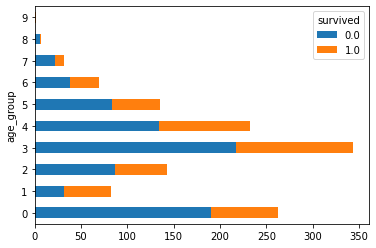

In [22]:
age_by_survived.plot(kind='barh', stacked=True)

In [23]:
def map_to_percent(r):
  return [float(v)/sum(r) for v in r]

age_by_survived_prc = age_by_survived.apply(map_to_percent, axis=1, result_type='broadcast')
age_by_survived_prc.info()
age_by_survived_prc

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.0     10 non-null     float64
 1   1.0     10 non-null     float64
dtypes: float64(2)
memory usage: 560.0 bytes


survived,0.0,1.0
age_group,,
0,0.722433,0.277567
1,0.390244,0.609756
2,0.608392,0.391608
3,0.630814,0.369186
4,0.577586,0.422414
5,0.614815,0.385185
6,0.542857,0.457143
7,0.687500,0.312500
8,0.857143,0.142857


<AxesSubplot:ylabel='age_group'>

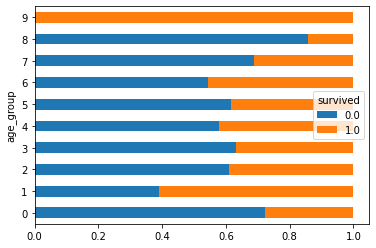

In [24]:
age_by_survived_prc.plot(kind='barh', stacked=True)

## Выжившие по полу 

In [25]:
sex_by_survived = df.groupby([SEX_COL, SURVIVED_COL]).size().unstack()
# Приводим к типу float
sex_by_survived = sex_by_survived[:].astype(float)
sex_by_survived.info()
sex_by_survived

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, female to male
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.0     2 non-null      float64
 1   1.0     2 non-null      float64
dtypes: float64(2)
memory usage: 48.0+ bytes


survived,0.0,1.0
sex,,
female,127.0,339.0
male,682.0,161.0


In [26]:
sex_by_survived_prc = sex_by_survived.apply(map_to_percent, axis=1, result_type='broadcast')
sex_by_survived_prc


survived,0.0,1.0
sex,,
female,0.272532,0.727468
male,0.809015,0.190985


<AxesSubplot:ylabel='sex'>

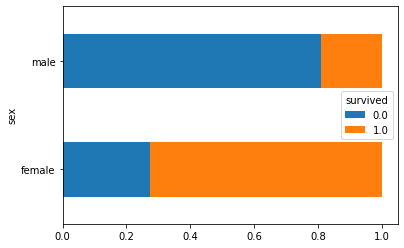

In [27]:
sex_by_survived_prc.plot(kind='barh', stacked=True)

## Выжившие по классу каюты 

<AxesSubplot:ylabel='pclass'>

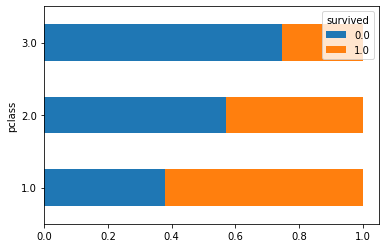

In [28]:
class_by_survived = df.groupby([PCLASS_COL, SURVIVED_COL]).size().unstack()
# Приводим к типу float
class_by_survived = class_by_survived[:].astype(float)
class_by_survived = class_by_survived.fillna(0).apply(map_to_percent, axis=1, result_type='broadcast')
class_by_survived.plot(kind="barh", stacked=True)

## Что за колонка Body ? 

In [29]:
# Добавляем новую колонку (признак)
df[BODY_HASVAL_COL] = df[BODY_COL].notna()
features = [BODY_COL, BODY_HASVAL_COL]
df[features].head()

,body,body_has_value
0,NaN,False
1,NaN,False
2,NaN,False
3,135.0,True
4,NaN,False


<AxesSubplot:ylabel='body_has_value'>

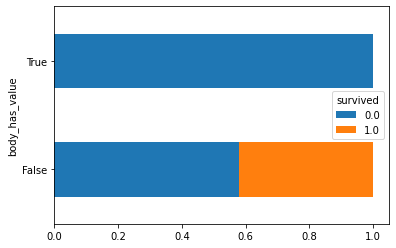

In [30]:
body_by_survived = df.groupby([BODY_HASVAL_COL, SURVIVED_COL]).size().unstack()
# Приводим к типу float
body_by_survived = body_by_survived[:].astype(float)
body_by_survived = body_by_survived.fillna(0).apply(map_to_percent, axis=1, result_type='broadcast')
body_by_survived.plot(kind="barh", stacked=True)

Как видно из данных, из тех, кто имеет заполненное значение body никто не выжил.
Эта колонка содержит номера присвоенные найденным и опознанным телам погибших.

In [31]:
df[BODY_HASVAL_COL].sum()

121

# Извлечение признаков из номера каюты

![Схема](img/titanic2.jpg)

## Кол-во заполненных значений cabin 

In [32]:
df[CABIN_COL].notna().sum()

295

In [33]:
# Добавляем новую колонку (признак)
df[CABIN_LEVEL_COL] = df[CABIN_COL].map(lambda cab: type(cab) is float and cab or cab[0])
df[CABIN_LEVEL_COL].value_counts()

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: cabin_level, dtype: int64

<AxesSubplot:ylabel='cabin_level'>

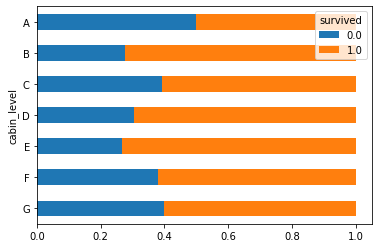

In [34]:
cabin_by_survived = df.groupby([CABIN_LEVEL_COL, SURVIVED_COL]).size().unstack()
# Удаляем строку с ключём T
cabin_by_survived = cabin_by_survived.drop(["T"])
# Приводим все значения к типу float
cabin_by_survived = cabin_by_survived[:].astype(float)
cabin_by_survived = cabin_by_survived.fillna(0).apply(map_to_percent, axis=1, result_type='broadcast')
# для наглядности картинки сортируем ключи в обратном порядке
cabin_by_survived = cabin_by_survived.sort_index(ascending=False)
# Рисуем график
cabin_by_survived.plot(kind="barh", stacked=True)